In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
df=pd.read_csv('hour.csv')
df.rename(columns={'yr':'year', 'mnth':'month','hr':'hour','cnt':'count'},inplace=True)
df.head()

,instant,dteday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [14]:
#dropping unnecessary columns
#total no of bikes is sum of registered and casual
#dteday is split in to year,season and workday, So we don't need it
df = df.drop(['instant','dteday','casual','registered'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   year        17379 non-null  int64  
 2   month       17379 non-null  int64  
 3   hour        17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   workingday  17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   atemp       17379 non-null  float64
 10  hum         17379 non-null  float64
 11  windspeed   17379 non-null  float64
 12  count       17379 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.7 MB


In [15]:
#treating missing value
df.isnull().any()
#there is no missing values

season        False
year          False
month         False
hour          False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
count         False
dtype: bool

In [16]:
#normalizatio
df.describe()
# all numerical data (temp,atemp,hum,windspeed) are already normalized

,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


<AxesSubplot:xlabel='count', ylabel='Count'>

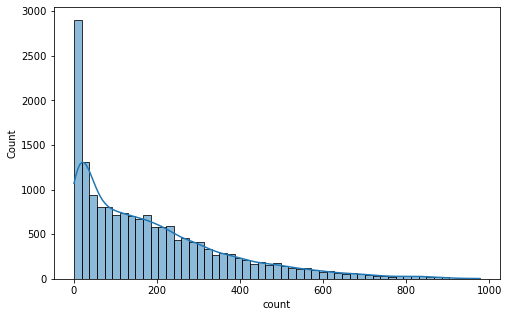

In [17]:
#histogram
plt.figure(figsize=(8,5))
sns.histplot(df['count'],kde=True)


<AxesSubplot:xlabel='weekday', ylabel='count'>

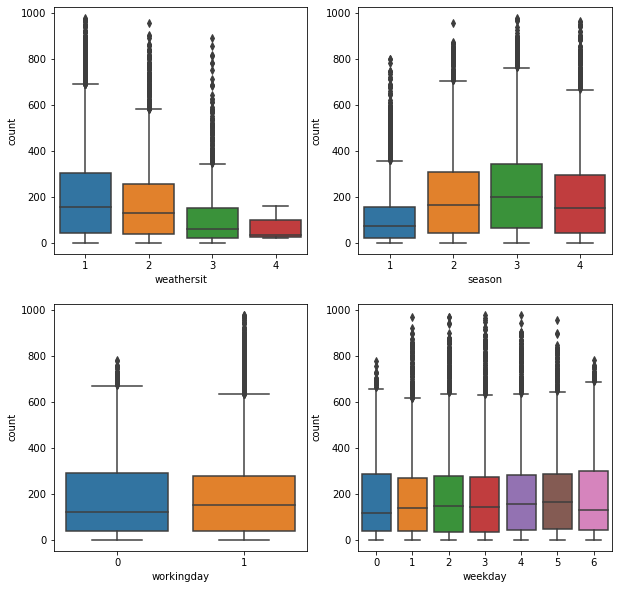

In [18]:
#boxplots
figure, axes = plt.subplots(2,2)
figure.set_size_inches(10, 10)

plt.subplot(2,2,1)
sns.boxplot(x='weathersit',y='count',data=df)
plt.subplot(2,2,2)
sns.boxplot(x='season',y='count',data=df)
plt.subplot(2,2,3)
sns.boxplot(x='workingday',y='count',data=df)
plt.subplot(2,2,4)
sns.boxplot(x='weekday',y='count',data=df)

C:\Users\Marzieh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='count'>

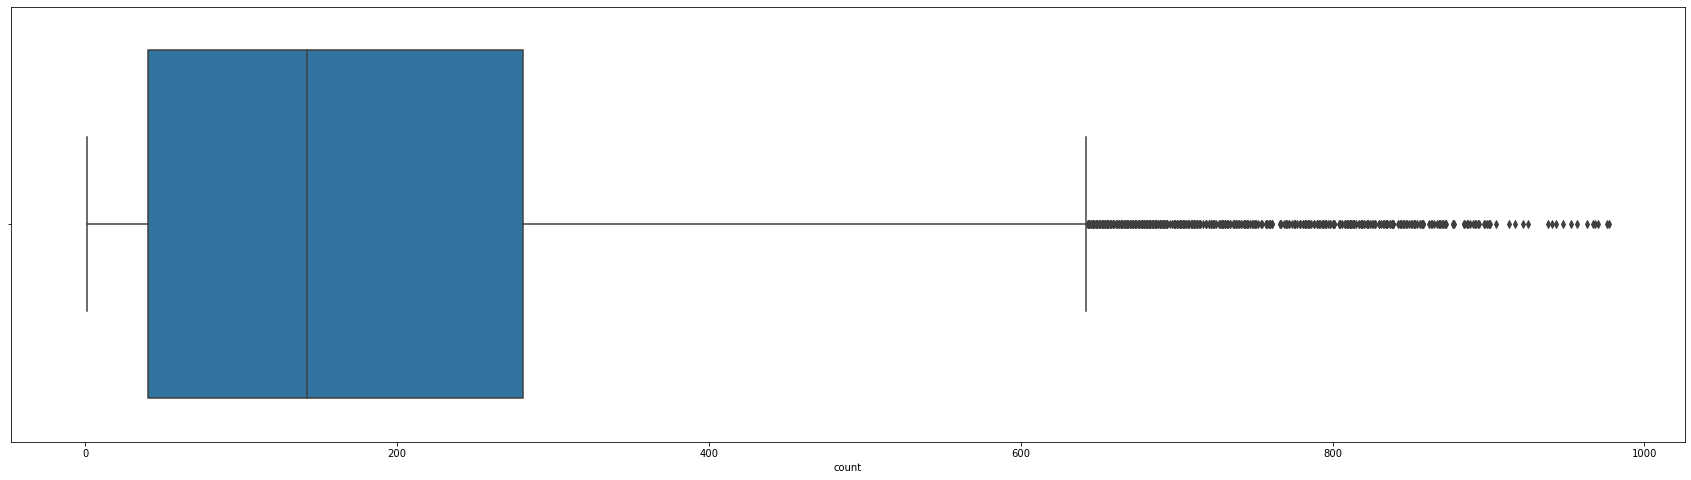

In [19]:
plt.figure(figsize=(30,8))
sns.boxplot(df['count'])

<AxesSubplot:xlabel='month', ylabel='count'>

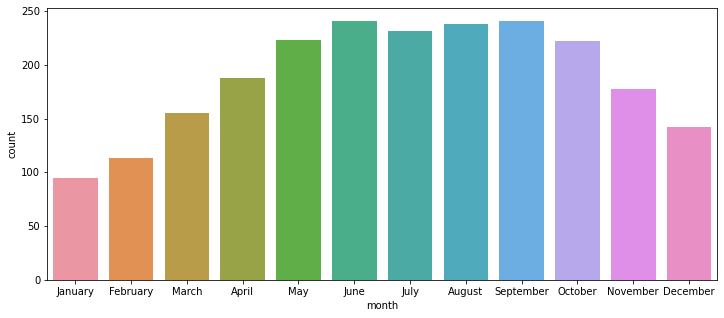

In [20]:
#bar plot (count by month)
month = ["January","February","March","April","May","June","July","August","September","October","November","December"]
month_df=pd.DataFrame(df.groupby('month')['count'].mean()).reset_index().sort_values(by='month')
month_df['month']=month
plt.figure(figsize=(12,5))
sns.barplot(data=month_df,x='month',y='count')

<AxesSubplot:xlabel='season', ylabel='count'>

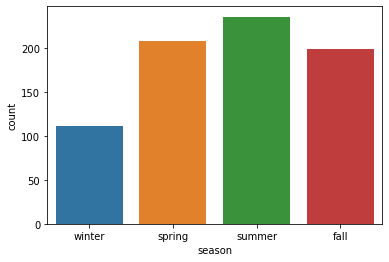

In [21]:
#bar plot(count by season)
season=['winter','spring','summer','fall']
season_df=pd.DataFrame(df.groupby('season')['count'].mean()).reset_index().sort_values(by='season')
season_df['season']=season
sns.barplot(data=season_df,x='season', y='count')

([<matplotlib.axis.XTick at 0x159f7bd56d0>,
 [Text(0.0, 0, 'January'),
  Text(1.0, 0, 'February'),
  Text(2.0, 0, 'March'),
  Text(3.0, 0, 'April'),
  Text(4.0, 0, 'May'),
  Text(5.0, 0, 'June'),
  Text(6.0, 0, 'July'),
  Text(7.0, 0, 'August'),
  Text(8.0, 0, 'September'),
  Text(9.0, 0, 'October'),
  Text(10.0, 0, 'November'),
  Text(11.0, 0, 'December')])

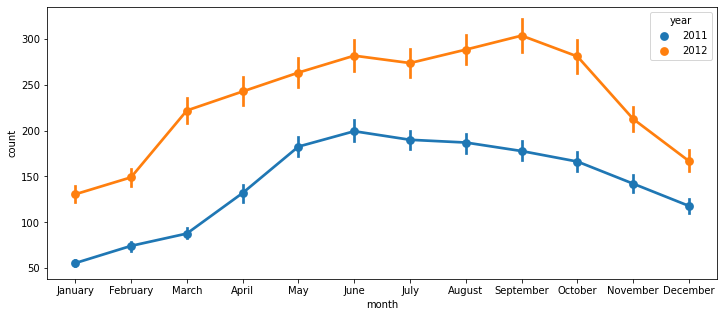

In [22]:
#point plot(count by year and month)
plt.figure(figsize=(12,5))
year_df=df.copy()
year_df['year'].replace([0,1],[2011,2012],inplace=True)
sns.pointplot(data=year_df, x='month', y='count', hue='year')
plt.xticks(np.linspace(0,11,12), month)

<AxesSubplot:xlabel='hour', ylabel='count'>

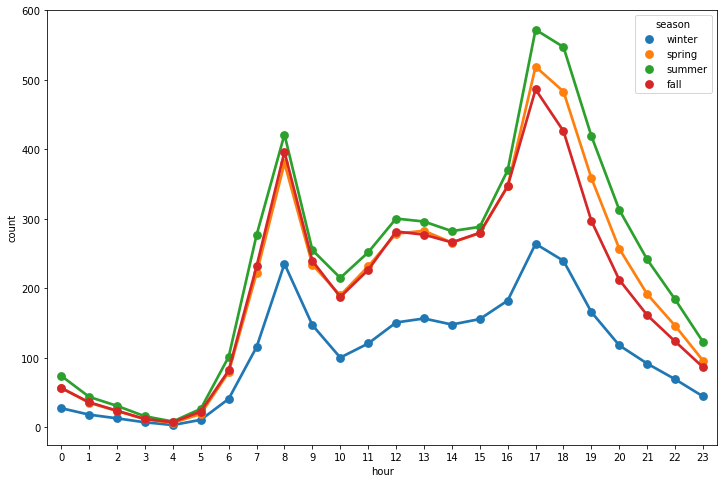

In [23]:
#point plot (count by hour and season)
hour_df=pd.DataFrame(df.groupby(['hour','season'])['count'].mean()).reset_index()
hour_df['season'].replace([1,2,3,4],['winter','spring','summer','fall'],inplace=True)
plt.figure(figsize=(12,8))
sns.pointplot(x=hour_df["hour"], y=hour_df["count"],hue=hour_df["season"], data=hour_df)

<AxesSubplot:xlabel='weekday', ylabel='count'>

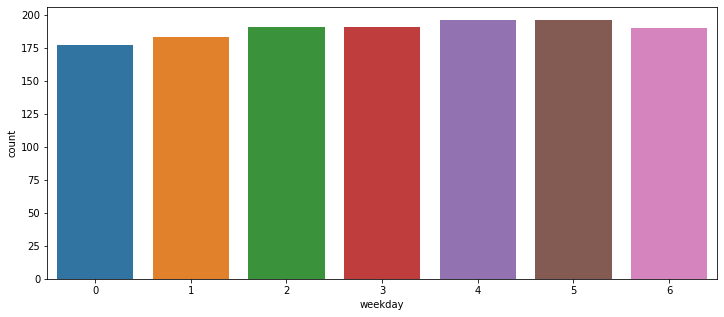

In [24]:
#bar plot(count by weekday)
weekday_df=pd.DataFrame(df.groupby(['weekday'])['count'].mean()).reset_index()
plt.figure(figsize=(12,5))
sns.barplot(data=weekday_df,x='weekday',y='count')

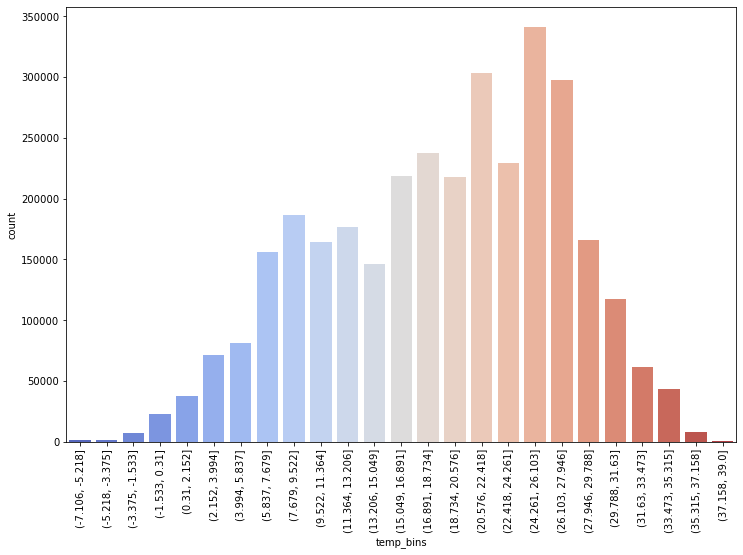

In [25]:
#bar plot (count by temp_bin)
t_max=39
t_min=-8
temp_df=df.copy()
temp_df['t_real']=temp_df['temp']*(t_max-t_min)+t_min
plt.figure(figsize=(12,8))
temp_df['temp_bins']=pd.cut(temp_df['t_real'],25)
temp_df=pd.DataFrame(temp_df.groupby('temp_bins')['count'].sum()).reset_index()
ax=sns.barplot(data=temp_df,x='temp_bins', y='count', palette='coolwarm')
ax.set_xticklabels( ax.get_xticklabels(),rotation=90);

<AxesSubplot:>

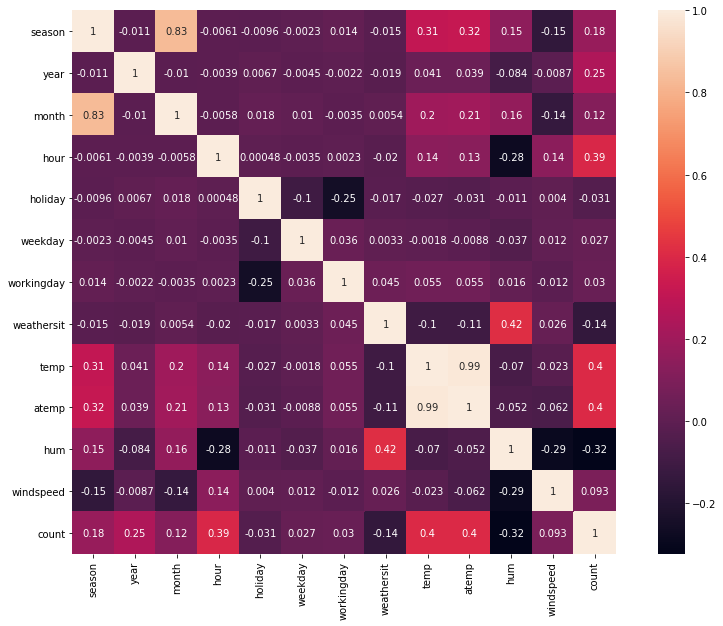

In [26]:
# correlation among data
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(),square=True,annot=True)

In [27]:
#temp and atemp are highly correlated, So we remove atemp.
#holiday and workingday are also highly inversely related 
df=df.drop(['atemp','holiday'],axis=1)

In [28]:
#Onehot_encoding of categorical features
col = ['season','weathersit','workingday']
for i in col:
    dummies = pd.get_dummies(df[i],prefix=i)
    df=pd.concat([df,dummies],axis=1)
df=df.drop(col,axis=1)
df.shape

(17379, 18)

In [29]:
#train-test split
target=df['count']
data=df.drop('count',axis=1)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,target,test_size=0.2, random_state=42)

In [30]:
#bulding model
params = {'n_estimators': 200, 'max_depth':10, 'min_samples_leaf':10,'learning_rate':0.1, 'loss':'lad'}
reg=GradientBoostingRegressor(**params)
reg.fit(X_train,y_train)
y_predict=reg.predict(X_test)
mean_absolute_error(y_predict,y_test)

22.972702496796916

In [31]:
r2_score(y_predict,y_test)

0.9483262525195827